In [1]:
import numpy as np
import pandas as pd
import sklearn.model_selection
import matplotlib.pyplot as plt
import numpy as np

In [2]:
#Loading Data
x_train_df = pd.read_csv('data_reviews/x_train.csv')
x_text=x_train_df['text'];
tr_size=x_train_df.shape[0]
x_tests_df = pd.read_csv('data_reviews/x_test.csv')
x_test_text = x_tests_df['text'];
y_train_df = pd.read_csv('data_reviews/y_train.csv')
print(x_tests_df.shape[0])

600


In [3]:
## Print data
tr_text_list_ORG = x_train_df['text'].values.tolist()
# print(len(tr_text_list_ORG))
# for text in tr_text_list_ORG:
#    print(text)

In [4]:
#sen=tr_text_list[0]
#print(sen)
#words=sen.split()
#print(words)

In [5]:
# Remove Digits:
x_train_df['text']=x_train_df['text'].apply(lambda sen:''.join([i for i in sen if not i.isdigit()]))
x_tests_df['text']=x_tests_df['text'].apply(lambda sen:''.join([i for i in sen if not i.isdigit()]))
x_train_df['text'].head()

0    Oh and I forgot to also mention the weird colo...
1                         THAT one didn't work either.
2                                     Waste of  bucks.
3    Product is useless, since it does not have eno...
4    None of the three sizes they sent with the hea...
Name: text, dtype: object

In [6]:
## Exclude punctuation
x_train_df['text']=x_train_df['text'].str.replace('[^\w\s]','')
x_tests_df['text']=x_tests_df['text'].str.replace('[^\w\s]','')
x_train_df['text'].head()

0    Oh and I forgot to also mention the weird colo...
1                           THAT one didnt work either
2                                      Waste of  bucks
3    Product is useless since it does not have enou...
4    None of the three sizes they sent with the hea...
Name: text, dtype: object

In [7]:
## Lower case
x_train_df['text']=x_train_df['text'].apply(lambda sen:" ".join(x.lower() for x in sen.split()))
x_tests_df['text']=x_tests_df['text'].apply(lambda sen:" ".join(x.lower() for x in sen.split()))
x_train_df['text'].head()

0    oh and i forgot to also mention the weird colo...
1                           that one didnt work either
2                                       waste of bucks
3    product is useless since it does not have enou...
4    none of the three sizes they sent with the hea...
Name: text, dtype: object

In [8]:
## Remove Low/High freq words
Lfreq=pd.Series(' '.join(x_train_df['text']).split()).value_counts()
Lfreq=Lfreq[Lfreq>1][10:] ## Remove top 10 frequent word, and words appears only 1 time.
Lfreq=list(Lfreq.index)
x_train_df['text']=x_train_df['text'].apply(lambda sen:' '.join(x for x in sen.split() if x in Lfreq))
x_tests_df['text']=x_tests_df['text'].apply(lambda sen:' '.join(x for x in sen.split() if x in Lfreq))

In [9]:
## Print data
tr_text_list = x_train_df['text'].values.tolist()
te_text_list = x_tests_df['text'].values.tolist()
to_text_list = tr_text_list+te_text_list
for text in te_text_list:
    print(text)

only phone as its device
disappointing from good
one big player that buttons on phones front cover that let you songs out after few seconds
particular would not work with my motorola
if two were by started static sound from headset
also area where my unit broke im not too
what me get junk have no idea
mic there joke volume quite low
purchased within days no longer working
picture far below what other phones are today
after with verizon dropped calls we phones after two days
my experience terrible my bluetooth headset while much more comfortable than my last jabra which hated
poor talk time performance
for car charger does not work
trying make call on these an in
didnt think that instructions provided were helpful me
worst phone from samsung worst have ever
disappointed with battery
say wasted my money
also had new problem
when battery connection device turned off
not as good as had
yet use same flawed charger design
doesnt do job
bought two them neither will charge
low quality so as ma

In [10]:
## Vectorize
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
vectorizer1 = CountVectorizer()
vectorizer2 = TfidfVectorizer()
X1 = vectorizer1.fit_transform(tr_text_list)
x1n= vectorizer1.transform(te_text_list)
X2all= vectorizer2.fit_transform(to_text_list)
X2 = vectorizer2.fit_transform(tr_text_list)
X2n= vectorizer2.transform(te_text_list)
features=vectorizer2.get_feature_names()
##print(X2)

### 1a   
Here is a list of things I did to transform:    
1 Remove puctuation and digits   
2 Transform to lower-case.   
3 Count numbers of appearance of a word and exclude top 10 as well as those appears only once.   
Then I used Tfidf converting single words into vector.     
The size of vocabulary is 1860. 

## Start Fitting

In [11]:
## K-folders
kfold_iterator = sklearn.model_selection.KFold(
        n_splits=5, shuffle=True, random_state=None)

### 1b

In [12]:
## Naive Bayes TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import cross_val_score
import sklearn
alpha_val=[0.001, 0.01, 0.1, 1.0, 10.0, 100.0]
va_scores=[];
tr_scores=[];
for a in alpha_val:
    Mnb = MultinomialNB(alpha=a)
    #scores.append(cross_val_score(Mnb, X2.toarray(), y_train_df['is_positive_sentiment'], cv=5))
    
    va_all=[];
    tr_all=[]
    for ind_tr, ind_va in kfold_iterator.split(X2):
        x_tr, x_va = X2[ind_tr], X2[ind_va]
        y_tr, y_va = y_train_df['is_positive_sentiment'][ind_tr], y_train_df['is_positive_sentiment'][ind_va]
        Mnb.fit(x_tr, y_tr)
    
        #get valid mse
        ac_va=1-np.sum(np.logical_xor(y_va,Mnb.predict(x_va)))/y_va.size
        ac_tr=1-np.sum(np.logical_xor(y_tr,Mnb.predict(x_tr)))/y_tr.size
        #print(ac_va, ac_tr)
        va_all.append(ac_va)
        tr_all.append(ac_tr)
    va_scores.append(np.asarray(va_all))
    tr_scores.append(np.asarray(tr_all))
#print(scores)

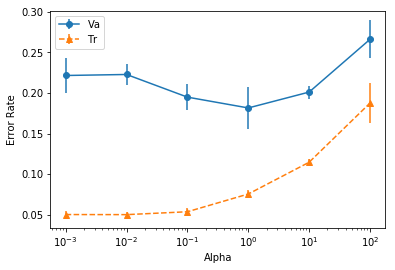

In [13]:
y_va=[]; e_va=[];
for l in va_scores:
    #print(l)
    e_va.append(np.std(1-l));
    y_va.append(np.mean(1-l));
plt.errorbar(alpha_val, y_va, e_va, linestyle='-', marker='o', label='Va')

y_tr=[]; e_tr=[];
for l in tr_scores:
    e_tr.append(np.std(1-l));
    y_tr.append(np.mean(1-l));
plt.errorbar(alpha_val, y_tr, e_tr, linestyle='--', marker='^', label='Tr')
plt.xscale('log')
plt.xlabel('Alpha')
plt.ylabel('Error Rate')
plt.legend()
plt.show()

#print(e_tr)

1 MultinomialNB is a specialized version of Naive Bayes that is designed more for text documents, which explicitly models the word counts and adjusts the underlying calculations to deal with in.    

2 There isn't any important details in training, no convergence problems or step-size issues.    

3 The influence of Additive smoothing parameter(alpha) is explored. When alpha is big($>10$), the model is underfitting. When alpha is small($<0.1$), the model is overfitting. I choose $\alpha=1$ because it has the smallest error rate and the standard deviation is small.   

4 We use K-folder validation. We randomly divide the training sets into K(=5) folders. Each time we use 1 folder as validation set, K-1 folders as training set. Then we fit the model and figure out the error rate of training and validation set.        

5 Additive smoothing parameter(alpha) is explored. The choice of value is 1. The conclusion is valid.

In [14]:
M1b=MultinomialNB(alpha=1);
M1b.fit(X2,y_train_df['is_positive_sentiment'])
np.savetxt('yproba1b_test.txt', M1b.predict(X2n))

In [ ]:
t=np.loadtxt('yproba1b_test.txt')
print(t.size)

### 1c

In [15]:
## Logestic
from sklearn.linear_model import LogisticRegression as lr
va_scores1=[];
tr_scores1=[];

va_scores2=[];
tr_scores2=[];

for a in alpha_val:
    lr1 = lr(penalty='l1', tol=0.0001, C=a)
    lr2 = lr(penalty='l2', tol=0.0001, C=a)
    #scores.append(cross_val_score(Mnb, X2.toarray(), y_train_df['is_positive_sentiment'], cv=5))
    
    va1_all=[];
    tr1_all=[];
    va2_all=[];
    tr2_all=[];
    for ind_tr, ind_va in kfold_iterator.split(X2):
        x_tr, x_va = X2[ind_tr], X2[ind_va]
        y_tr, y_va = y_train_df['is_positive_sentiment'][ind_tr], y_train_df['is_positive_sentiment'][ind_va]
        lr1.fit(x_tr, y_tr)
        lr2.fit(x_tr, y_tr)
        #get valid mse
        ac_va1=1-np.sum(np.logical_xor(y_va,lr1.predict(x_va)>0.5))/y_va.size
        ac_tr1=1-np.sum(np.logical_xor(y_tr,lr1.predict(x_tr)>0.5))/y_tr.size
        
        ac_va2=1-np.sum(np.logical_xor(y_va,lr2.predict(x_va)>0.5))/y_va.size
        ac_tr2=1-np.sum(np.logical_xor(y_tr,lr2.predict(x_tr)>0.5))/y_tr.size
        #print(ac_va, ac_tr)
        va1_all.append(ac_va1)
        tr1_all.append(ac_tr1)
        
        va2_all.append(ac_va2)
        tr2_all.append(ac_tr2)
    va_scores1.append(np.asarray(va1_all))
    tr_scores1.append(np.asarray(tr1_all))
    
    va_scores2.append(np.asarray(va2_all))
    tr_scores2.append(np.asarray(tr2_all))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


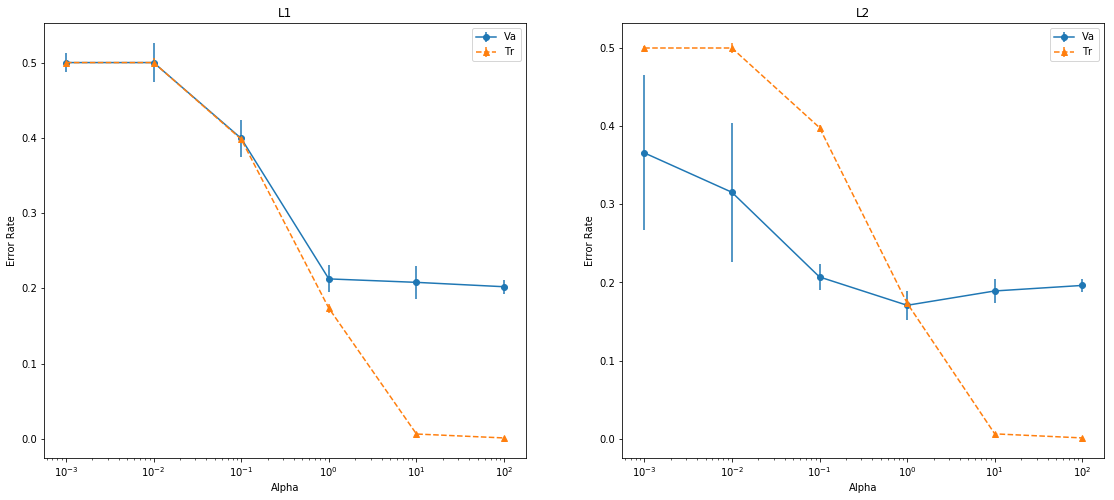

In [16]:
fig2a, axes_arr = plt.subplots(nrows=1, ncols=2, figsize=(19,8))
y_va1=[]; e_va1=[];
y_va2=[]; e_va2=[];
for l in va_scores1:
    #print(l)
    e_va1.append(np.std(1-l));
    y_va1.append(np.mean(1-l));
axes_arr[0].errorbar(alpha_val, y_va1, e_va1, linestyle='-', marker='o', label='Va')

y_tr1=[]; e_tr1=[];
y_tr2=[]; e_tr2=[];
for l in tr_scores1:
    e_tr1.append(np.std(1-l));
    y_tr1.append(np.mean(1-l));
axes_arr[0].errorbar(alpha_val, y_tr1, e_tr1, linestyle='--', marker='^', label='Tr')
axes_arr[0].set_xscale('log')
axes_arr[0].set_xlabel('Alpha')
axes_arr[0].set_ylabel('Error Rate')
axes_arr[0].set_title('L1')
axes_arr[0].legend()

for l in va_scores2:
    #print(l)
    e_va2.append(np.std(1-l));
    y_va2.append(np.mean(1-l));
axes_arr[1].errorbar(alpha_val, y_va2, e_va2, linestyle='-', marker='o', label='Va')

for l in tr_scores1:
    e_tr2.append(np.std(1-l));
    y_tr2.append(np.mean(1-l));
axes_arr[1].errorbar(alpha_val, y_tr2, e_tr2, linestyle='--', marker='^', label='Tr')
axes_arr[1].set_xscale('log')
axes_arr[1].set_xlabel('Alpha')
axes_arr[1].set_ylabel('Error Rate')
axes_arr[1].set_title('L2')
axes_arr[1].legend()

1 Logestic Regression is a typical method for classification. In general, it's pretty robust on solving classification problems.     

2 There isn't any important details in training, no convergence problems or step-size issues.    

3 The influence of regularization parameter is explored. When C is small(<1), the model is underfitting. When C is big(>100), the model is overfitting. I choose $C=10$ because it has the smallest error rate and the standard deviation is small in both L1 and L2 penalization.   

4 We use K-folder validation. We randomly divide the training sets into K(=5) folders. Each time we use 1 folder as validation set, K-1 folders as training set. Then we fit the model and figure out the error rate of training and validation set.        

5 Another parameter(penalization norm) is explored. The choice of value is 'L2'. The conclusion is not strong as the difference in va sets is small. The choice of C is 10, as stated above.

In [ ]:
lr2 = lr(penalty='l2', tol=0.0001, C=10);
lr2.fit(X2,y_train_df['is_positive_sentiment'])
np.savetxt('yproba1c_test.txt', lr2.predict(X2n))

### 1d

In [17]:
## SVM
from sklearn.svm import SVC
va_scores1d=[]
tr_scores1d=[]
# clf = SVC(gamma='auto')

alpha_val1d=[1.0, 10.0, 100.0, 1000.0, 10000.0, 100000.0]
for a in alpha_val1d:
    SVM = SVC(C=a, gamma='auto')
    #scores.append(cross_val_score(Mnb, X2.toarray(), y_train_df['is_positive_sentiment'], cv=5))
    
    va_all=[];
    tr_all=[]
    for ind_tr, ind_va in kfold_iterator.split(X2):
        x_tr, x_va = X2[ind_tr], X2[ind_va]
        y_tr, y_va = y_train_df['is_positive_sentiment'][ind_tr], y_train_df['is_positive_sentiment'][ind_va]
        SVM.fit(x_tr, y_tr)
    
        #get valid mse
        ac_va=1-np.sum(np.logical_xor(y_va, SVM.predict(x_va)))/y_va.size
        ac_tr=1-np.sum(np.logical_xor(y_tr, SVM.predict(x_tr)))/y_tr.size
        #print(ac_va, ac_tr)
        va_all.append(ac_va)
        tr_all.append(ac_tr)
    va_scores1d.append(np.asarray(va_all))
    tr_scores1d.append(np.asarray(tr_all))

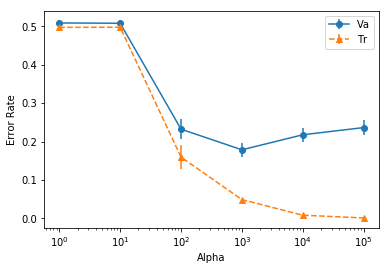

In [18]:
import matplotlib.pyplot as plt
import numpy as np

y_va=[]; e_va=[];
for l in va_scores1d:
    e_va.append(np.std(1-l));
    y_va.append(np.mean(1-l));
plt.errorbar(alpha_val1d, y_va, e_va, linestyle='-', marker='o', label='Va')

y_tr=[]; e_tr=[];
for l in tr_scores1d:
    e_tr.append(np.std(1-l));
    y_tr.append(np.mean(1-l));
plt.errorbar(alpha_val1d, y_tr, e_tr, linestyle='--', marker='^', label='Tr')
plt.xscale('log')
plt.xlabel('Alpha')
plt.ylabel('Error Rate')
plt.legend()
plt.show()

#print(e_tr)

1 SVM is Effective in high dimensional spaces. It's also memory efficient.     

2 There isn't any important details in training, no convergence problems or step-size issues.    

3 The influence of Penalty parameter C of the error term is explored. When C is small(<100), the model is underfitting. When C is big(>10000), the model is overfitting. I choose $C=1000$ because it has the smallest error rate and the standard deviation is small in both L1 and L2 penalization.   

4 We use K-folder validation. We randomly divide the training sets into K(=5) folders. Each time we use 1 folder as validation set, K-1 folders as training set. Then we fit the model and figure out the error rate of training and validation set.        

5 The choice of C is 1000, as stated above.

In [ ]:
SVM = SVC(C=1000, gamma='auto');
SVM.fit(X2,y_train_df['is_positive_sentiment'])
np.savetxt('yproba1d_test.txt', SVM.predict(X2n))

In [100]:
SVM.get_params()

{'C': 100,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'auto',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

### 1E   
The best model I have is the SVM model. The error rate is about 18.4%.      
One thing we can notice that only SVM gives a boundary (with kernel 'rbf') in all 3 methods. Thus it introduces more complicated non-linearity to the data, so it's probabably avoids underfitting.     
There are some mistakes in this model:     
For False Negative ones, there tends to be a 'not' followed by negative words.  
For False positive ones, there are words like "pretty", "many", which seems positive in other cases, but followed by negative opinions.     
It's hard to judge the importance of any factors in the SVM model. As we used rbf inner product to reform data and get a hyperplane dividing the points. The only thing we get is the hyper plane $h'*x+b=0$. This suggests the distance between those vectors are important to the clarification.     

In [ ]:
import random
y_hat=[]
y_hat=SVM.predict(X2)
FP=0; FN=0;
FPText=[]; FNText=[];
FPAllT=[]; FNAllT=[];

ls=np.asarray(range(0, y_hat.size))
#print(ls)
random.shuffle(ls);

for i in ls:
    if (y_hat[i]>=0.5 and y_train_df['is_positive_sentiment'][i]==0):
        FPText.append(tr_text_list[i])
        FPAllT.append(x_text[i])
    if (y_hat[i]<0.5 and y_train_df['is_positive_sentiment'][i]==1):
        FNText.append(tr_text_list[i])
        FNAllT.append(x_text[i])
       

In [84]:
print(FPText[:10])
print(FPAllT[:10])

['wont ever go here again', 'oh forgot also mention weird color effect has on your phone', 'pretty', 'im disappointed that film would receive so many especially when there are far more deserving works film out there', 'characters were very storyline lot like stage', 'ryans bar definitely one establishment wont be', 'you can find better movies at', 'well never go again', 'highly', 'are most']
["Won't ever go here again.", 'Oh and I forgot to also mention the weird color effect it has on your phone.', 'It was pretty gross!', "I'm terribly disappointed that this film would receive so many awards and accolades, especially when there are far more deserving works of film out there.  ", "The characters were very 'stagey' and the storyline was a lot like a stage farce.  ", "Ryan's Bar is definitely one Edinburgh establishment I won't be revisiting.", 'You can find better movies at youtube.  ', "We'll never go again.", 'Highly unrecommended.  ', 'The commercials are the most misleading.']


In [85]:
print(FNText[:10])
print(FNAllT[:10])

['still do like movie for its women theres not enough movies out there like one', 'they keep getting better better my third one ive had numerous too', 'wireless rocks so does cheap little phone', 'did not have any problem with item would order again if needed', 'chicken on chicken salad', 'dont think you will be disappointed', 'enough can not be said animation in film', 'able do voice dialing in car with no problem', 'found place by could not be happier', 'kind money that wasted properly']
["Still, I do like this movie for it's empowerment of women; there's not enough movies out there like this one.  ", "They keep getting better and better (this is my third one and I've had numerous Palms too).", 'Virgin Wireless rocks and so does this cheap little phone!', 'I did not have any problem with this item and would order it again if needed.', 'High-quality chicken on the chicken Caesar salad.', "I don't think you will be disappointed.  ", 'Enough can not be said of the remarkable animation i

### 1F    
The error rate is 18.2%.

### Problem 2

### 2A     
I used the same preprocess on excluding high frequency word and low frequency word in 1A:    
1 Remove puctuation and digits   
2 Transform to lower-case.   
3 Count numbers of appearance of a word and exclude top 10 as well as those appears only once.    
Then, I used average of words vector to calculate the embedding vector for a sentence.

In [11]:
##x_train_df x_tests_df

In [19]:
word_embeddings = pd.read_csv('glove.6B.50d.txt.zip',
                              header=None, sep=' ', index_col=0,
                              compression='zip', encoding='utf-8', quoting=3)
word_embeddings=word_embeddings.transpose()

In [20]:
word_embeddings['the'].values

array([ 4.1800e-01,  2.4968e-01, -4.1242e-01,  1.2170e-01,  3.4527e-01,
       -4.4457e-02, -4.9688e-01, -1.7862e-01, -6.6023e-04, -6.5660e-01,
        2.7843e-01, -1.4767e-01, -5.5677e-01,  1.4658e-01, -9.5095e-03,
        1.1658e-02,  1.0204e-01, -1.2792e-01, -8.4430e-01, -1.2181e-01,
       -1.6801e-02, -3.3279e-01, -1.5520e-01, -2.3131e-01, -1.9181e-01,
       -1.8823e+00, -7.6746e-01,  9.9051e-02, -4.2125e-01, -1.9526e-01,
        4.0071e+00, -1.8594e-01, -5.2287e-01, -3.1681e-01,  5.9213e-04,
        7.4449e-03,  1.7778e-01, -1.5897e-01,  1.2041e-02, -5.4223e-02,
       -2.9871e-01, -1.5749e-01, -3.4758e-01, -4.5637e-02, -4.4251e-01,
        1.8785e-01,  2.7849e-03, -1.8411e-01, -1.1514e-01, -7.8581e-01])

In [21]:
train_ebd_vector=[];

for l in tr_text_list:
    n=0.0001;
    cur=np.asarray([0.0]*50);
    for x in l.split():
        if x in word_embeddings.columns:
            cur=cur+np.asarray(word_embeddings[x].values)
            n=n+1.0
    train_ebd_vector.append(cur/n)
    #print(cur/n);

In [22]:
tests_ebd_vector=[];
for l in te_text_list:
    n=0.0001;
    cur=np.asarray([0.0]*50);
    for x in l.split():
        if x in word_embeddings.columns:
            cur=cur+np.asarray(word_embeddings[x].values)
            n=n+1.0
    tests_ebd_vector.append(cur/n)

In [23]:
X3 = np.asarray(train_ebd_vector);

X3n= np.asarray(tests_ebd_vector);
m=min(X3n.min(),X3.min());
print(m,X3.shape, X3n.shape)

-2.438956104389561 (2400, 50) (600, 50)


### 2b

In [18]:
## Naive Bayes Word Embedding
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score
import sklearn
alpha_val=[1e-20, 1e-13, 1e-11, 1e-9, 1e-7, 1e-5, 0.001, 0.1, 1.0, 10.0, 100.0]
va_scores=[];
tr_scores=[];

for a in alpha_val:
    Mnb = GaussianNB(var_smoothing=a)
    #scores.append(cross_val_score(Mnb, X2.toarray(), y_train_df['is_positive_sentiment'], cv=5))
    
    va_all=[];
    tr_all=[]
    for ind_tr, ind_va in kfold_iterator.split(X3-m):
        x_tr, x_va = X3[ind_tr], X3[ind_va]
        y_tr, y_va = y_train_df['is_positive_sentiment'][ind_tr], y_train_df['is_positive_sentiment'][ind_va]
        Mnb.fit(x_tr, y_tr)
    
        #get valid mse
        ac_va=1-np.sum(np.logical_xor(y_va,Mnb.predict(x_va)))/y_va.size
        ac_tr=1-np.sum(np.logical_xor(y_tr,Mnb.predict(x_tr)))/y_tr.size
        #print(ac_va, ac_tr)
        va_all.append(ac_va)
        tr_all.append(ac_tr)
    va_scores.append(np.asarray(va_all))
    tr_scores.append(np.asarray(tr_all))
#print(scores)

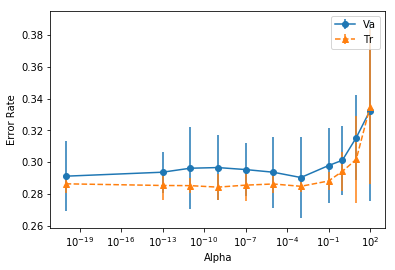

In [19]:
import matplotlib.pyplot as plt
import numpy as np

y_va=[]; e_va=[];
for l in va_scores:
    #print(l)
    e_va.append(np.std(1-l));
    y_va.append(np.mean(1-l));
plt.errorbar(alpha_val, y_va, e_va, linestyle='-', marker='o', label='Va')

y_tr=[]; e_tr=[];
for l in tr_scores:
    e_tr.append(np.std(1-l));
    y_tr.append(np.mean(1-l));
plt.errorbar(alpha_val, y_tr, e_tr, linestyle='--', marker='^', label='Tr')
plt.xscale('log')
plt.xlabel('Alpha')
plt.ylabel('Error Rate')
plt.legend()
plt.show()

#print(e_tr)

1 I used the normal Naive Bayes as there are negative values in the vector. MNB is not appliable in this situation.   

2 There isn't any important details in training, no convergence problems or step-size issues.    

3 The influence of Additive smoothing parameter(alpha) is explored. When alpha is big($>1$), the model is underfitting. When alpha is small($<10^{-10}$), the model is overfitting. I choose $\alpha=10^{-5}$ because it has the smallest error rate and the standard deviation is small.   

4 We use K-folder validation. We randomly divide the training sets into K(=5) folders. Each time we use 1 folder as validation set, K-1 folders as training set. Then we fit the model and figure out the error rate of training and validation set.        

5 Additive smoothing parameter(alpha) is explored. The choice of value is $\alpha=10^{-5}$. The conclusion is not valid as the difference of accuracy when alpha is less than 1 is subtle.

In [20]:
M1b=GaussianNB(var_smoothing=1e-5);
M1b.fit(X3,y_train_df['is_positive_sentiment'])
np.savetxt('yproba2b_test.txt', M1b.predict(X3n))

### 2c

In [21]:
## Logestic
from sklearn.linear_model import LogisticRegression as lr
va_scores1=[];
tr_scores1=[];

va_scores2=[];
tr_scores2=[];
alpha_val=[0.001, 0.01, 0.1, 1.0, 10.0, 100.0]

for a in alpha_val:
    lr1 = lr(penalty='l1', tol=0.0001, C=a, solver='liblinear')
    lr2 = lr(penalty='l2', tol=0.0001, C=a, solver='liblinear')
    #scores.append(cross_val_score(Mnb, X2.toarray(), y_train_df['is_positive_sentiment'], cv=5))
    
    va1_all=[];
    tr1_all=[];
    va2_all=[];
    tr2_all=[];
    for ind_tr, ind_va in kfold_iterator.split(X3):
        x_tr, x_va = X3[ind_tr], X3[ind_va]
        y_tr, y_va = y_train_df['is_positive_sentiment'][ind_tr], y_train_df['is_positive_sentiment'][ind_va]
        lr1.fit(x_tr, y_tr)
        lr2.fit(x_tr, y_tr)
        #get valid mse
        ac_va1=1-np.sum(np.logical_xor(y_va,lr1.predict(x_va)>0.5))/y_va.size
        ac_tr1=1-np.sum(np.logical_xor(y_tr,lr1.predict(x_tr)>0.5))/y_tr.size
        
        ac_va2=1-np.sum(np.logical_xor(y_va,lr2.predict(x_va)>0.5))/y_va.size
        ac_tr2=1-np.sum(np.logical_xor(y_tr,lr2.predict(x_tr)>0.5))/y_tr.size
        #print(ac_va, ac_tr)
        va1_all.append(ac_va1)
        tr1_all.append(ac_tr1)
        
        va2_all.append(ac_va2)
        tr2_all.append(ac_tr2)
    va_scores1.append(np.asarray(va1_all))
    tr_scores1.append(np.asarray(tr1_all))
    
    va_scores2.append(np.asarray(va2_all))
    tr_scores2.append(np.asarray(tr2_all))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


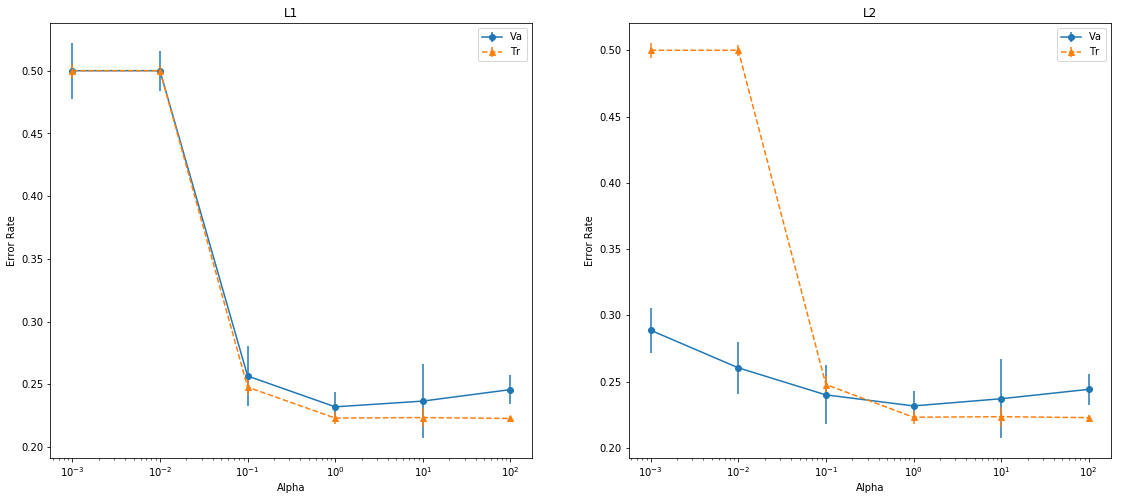

In [22]:
fig2a, axes_arr = plt.subplots(nrows=1, ncols=2, figsize=(19,8))
y_va1=[]; e_va1=[];
y_va2=[]; e_va2=[];
for l in va_scores1:
    #print(l)
    e_va1.append(np.std(1-l));
    y_va1.append(np.mean(1-l));
axes_arr[0].errorbar(alpha_val, y_va1, e_va1, linestyle='-', marker='o', label='Va')

y_tr1=[]; e_tr1=[];
y_tr2=[]; e_tr2=[];
for l in tr_scores1:
    e_tr1.append(np.std(1-l));
    y_tr1.append(np.mean(1-l));
axes_arr[0].errorbar(alpha_val, y_tr1, e_tr1, linestyle='--', marker='^', label='Tr')
axes_arr[0].set_xscale('log')
axes_arr[0].set_xlabel('Alpha')
axes_arr[0].set_ylabel('Error Rate')
axes_arr[0].set_title('L1')
axes_arr[0].legend()

for l in va_scores2:
    #print(l)
    e_va2.append(np.std(1-l));
    y_va2.append(np.mean(1-l));
axes_arr[1].errorbar(alpha_val, y_va2, e_va2, linestyle='-', marker='o', label='Va')

for l in tr_scores1:
    e_tr2.append(np.std(1-l));
    y_tr2.append(np.mean(1-l));
axes_arr[1].errorbar(alpha_val, y_tr2, e_tr2, linestyle='--', marker='^', label='Tr')
axes_arr[1].set_xscale('log')
axes_arr[1].set_xlabel('Alpha')
axes_arr[1].set_ylabel('Error Rate')
axes_arr[1].set_title('L2')
axes_arr[1].legend()

1 Logestic Regression is a typical method for classification. In general, it's pretty robust on solving classification problems.     

2 There isn't any important details in training, no convergence problems or step-size issues.    

3 The influence of regularization parameter is explored. When C is small(<1), the model is underfitting. When C is big(>100), the model is overfitting. I choose $C=1$ because it has the smallest error rate and the standard deviation is small in both L1 and L2 penalization.   

4 We use K-folder validation. We randomly divide the training sets into K(=5) folders. Each time we use 1 folder as validation set, K-1 folders as training set. Then we fit the model and figure out the error rate of training and validation set.        

5 Another parameter(penalization norm) is explored. The choice of value is 'L2'. The conclusion is not strong as the difference in va sets is small. The choice of C is 1, as stated above.

In [23]:
lr2 = lr(penalty='l2', tol=0.0001, C=1, solver='liblinear');
lr2.fit(X3,y_train_df['is_positive_sentiment'])
np.savetxt('yproba2c2_test.txt', lr2.predict(X3n))

### 2d

In [24]:
## SVM
from sklearn.svm import SVC
va_scores1d=[]
tr_scores1d=[]
# clf = SVC(gamma='auto')

alpha_val1d=[0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0, 10000.0, 100000.0]
for a in alpha_val1d:
    SVM = SVC(C=a, gamma='auto')
    #scores.append(cross_val_score(Mnb, X2.toarray(), y_train_df['is_positive_sentiment'], cv=5))
    
    va_all=[];
    tr_all=[]
    for ind_tr, ind_va in kfold_iterator.split(X3):
        x_tr, x_va = X3[ind_tr], X3[ind_va]
        y_tr, y_va = y_train_df['is_positive_sentiment'][ind_tr], y_train_df['is_positive_sentiment'][ind_va]
        SVM.fit(x_tr, y_tr)
    
        #get valid mse
        ac_va=1-np.sum(np.logical_xor(y_va, SVM.predict(x_va)))/y_va.size
        ac_tr=1-np.sum(np.logical_xor(y_tr, SVM.predict(x_tr)))/y_tr.size
        #print(ac_va, ac_tr)
        va_all.append(ac_va)
        tr_all.append(ac_tr)
    va_scores1d.append(np.asarray(va_all))
    tr_scores1d.append(np.asarray(tr_all))

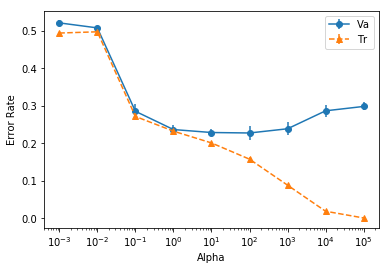

In [25]:
import matplotlib.pyplot as plt
import numpy as np

y_va=[]; e_va=[];
for l in va_scores1d:
    e_va.append(np.std(1-l));
    y_va.append(np.mean(1-l));
plt.errorbar(alpha_val1d, y_va, e_va, linestyle='-', marker='o', label='Va')

y_tr=[]; e_tr=[];
for l in tr_scores1d:
    e_tr.append(np.std(1-l));
    y_tr.append(np.mean(1-l));
plt.errorbar(alpha_val1d, y_tr, e_tr, linestyle='--', marker='^', label='Tr')
plt.xscale('log')
plt.xlabel('Alpha')
plt.ylabel('Error Rate')
plt.legend()
plt.show()

#print(e_tr)

1 SVM is Effective in high dimensional spaces. It's also memory efficient.     

2 There isn't any important details in training, no convergence problems or step-size issues.    

3 The influence of Penalty parameter C of the error term is explored. When C is small(<100), the model is underfitting. When C is big(>1000), the model is overfitting. I choose $C=100$ because it has the smallest error rate and the standard deviation is small in both L1 and L2 penalization.   

4 We use K-folder validation. We randomly divide the training sets into K(=5) folders. Each time we use 1 folder as validation set, K-1 folders as training set. Then we fit the model and figure out the error rate of training and validation set.        

5 The choice of C is 100, as stated above.

In [26]:
SVM = SVC(C=100, gamma='auto');
SVM.fit(X3,y_train_df['is_positive_sentiment'])
np.savetxt('yproba2d2_test.txt', SVM.predict(X3n))

### 2E   
The best model I have is still the SVM model. The error rate is about 20%.      
One thing we can notice that only SVM gives a boundary (with kernel 'rbf') in all 3 methods. Thus it introduces more complicated non-linearity to the data, so it's probabably avoids underfitting.     
There are similar mistakes in this model with 1:     
For False Negative ones, there tends to be a 'not' followed by negative words.  
For False positive ones, there are words like "pretty", "many", which seems positive in other cases, but followed by negative opinions.     
It's hard to judge the importance of any factors in the SVM model. As we used rbf inner product to reform data and get a hyperplane dividing the points. The only thing we get is the hyper plane $h'*x+b=0$. This suggests the distance between those vectors are important to the clarification.   

## 2F    
The error rate is 19.6%.

### 3

In [24]:
X4 =np.concatenate([np.asmatrix(X2.todense()), X3], axis=1)
X4n=np.concatenate([np.asmatrix(X2n.todense()), X3n], axis=1)
print(X4.shape, X4n.shape)

(2400, 1918) (600, 1918)


In [25]:
## SVM
from sklearn.svm import SVC
va_scores1d=[]
tr_scores1d=[]
# clf = SVC(gamma='auto')

alpha_val1d=[100,400, 700, 1000]
for a in alpha_val1d:
    print(a)
    SVM3 = SVC(C=a, gamma='auto')
    #scores.append(cross_val_score(Mnb, X2.toarray(), y_train_df['is_positive_sentiment'], cv=5))
    
    va_all=[];
    tr_all=[]
    for ind_tr, ind_va in kfold_iterator.split(X4):
        x_tr, x_va = X4[ind_tr], X4[ind_va]
        y_tr, y_va = y_train_df['is_positive_sentiment'][ind_tr], y_train_df['is_positive_sentiment'][ind_va]
        SVM3.fit(x_tr, y_tr)
    
        #get valid mse
        ac_va=1-np.sum(np.logical_xor(y_va, SVM3.predict(x_va)))/y_va.size
        ac_tr=1-np.sum(np.logical_xor(y_tr, SVM3.predict(x_tr)))/y_tr.size
        #print(ac_va, ac_tr)
        va_all.append(ac_va)
        tr_all.append(ac_tr)
    va_scores1d.append(np.asarray(va_all))
    tr_scores1d.append(np.asarray(tr_all))

100
400
700
1000


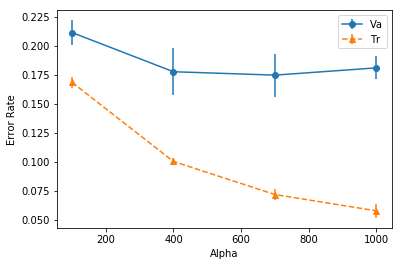

In [26]:
import matplotlib.pyplot as plt
import numpy as np

y_va=[]; e_va=[];
for l in va_scores1d:
    e_va.append(np.std(1-l));
    y_va.append(np.mean(1-l));
plt.errorbar(alpha_val1d, y_va, e_va, linestyle='-', marker='o', label='Va')

y_tr=[]; e_tr=[];
for l in tr_scores1d:
    e_tr.append(np.std(1-l));
    y_tr.append(np.mean(1-l));
plt.errorbar(alpha_val1d, y_tr, e_tr, linestyle='--', marker='^', label='Tr')
##plt.xscale('log')
plt.xlabel('Alpha')
plt.ylabel('Error Rate')
plt.legend()
plt.show()

#print(e_tr)

In [27]:
SVM = SVC(C=700);
SVM.fit(X4,y_train_df['is_positive_sentiment'])
np.savetxt('yproba2d2_test.txt', SVM.predict(X4n))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


I combined my tfidf set and my embedding set. I also adjusted my penalty a little bit by exploring an optimal value between 100 and 1000. 

The improvement is small.    

The final Result is 18%.